In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF
import datetime as dt

In [2]:
df = pd.read_csv('./PARAFAC implementation/Testing data/combined_sensor_data_average_ok_values.csv',index_col = 0)

C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.Name

3           K-RVK-001-RS113
6           K-RVK-001-RS113
9           K-RVK-001-RS113
12          K-RVK-001-RS113
15          K-RVK-001-RS113
                 ...       
27176471    K-RVK-116-RS111
27176474    K-RVK-116-RS111
27176477    K-RVK-116-RS111
27176480    K-RVK-116-RS111
27176482    K-RVK-116-RS111
Name: Name, Length: 9079253, dtype: object

In [4]:
# df_test = df.loc[df.Name == 'K-RVK-036-RS211']
df_test = df.loc[df.Name == 'K-RVK-002-RS261']
# df_test = df.loc[df.Name == 'K-RVK-013-RS211']
# df_test = df.loc[df.Name == 'K-RVK-038-RS211']
# df_test = df.loc[df.Name == 'K-RVK-049-RS221']
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.sort_index()
# df_test = df_test.loc[df_test.OkPct >= 98]
# df_test = df_test.loc[df_test.Flag == 524480]
# x = df_test.loc[(df_test.CType == 4) & (df_test.Val > 0),:].Val

Text(0.5, 1.0, 'Raw data')

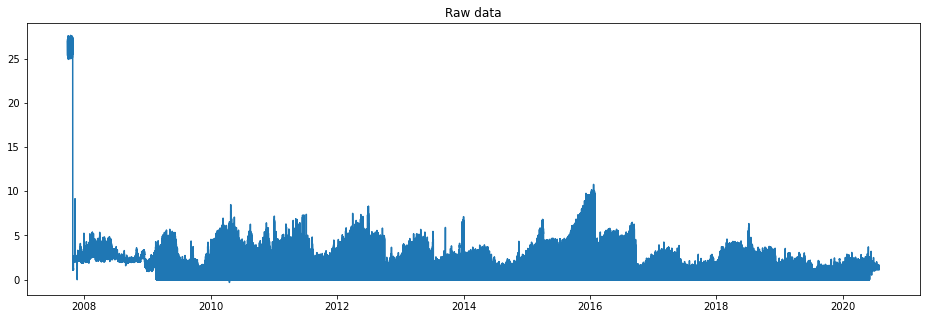

In [5]:
plt.figure(figsize=(16,5))
plt.plot(df_test.Val)
plt.title('Raw data')

In [6]:
df_test

,Name,CTime,Val
CTime,,,
2007-09-26 17:00:00,K-RVK-002-RS261,2007-09-26 17:00:00.000,26.966000
2007-09-26 18:00:00,K-RVK-002-RS261,2007-09-26 18:00:00.000,26.949000
2007-09-26 19:00:00,K-RVK-002-RS261,2007-09-26 19:00:00.000,26.771000
2007-09-26 20:00:00,K-RVK-002-RS261,2007-09-26 20:00:00.000,25.324000
2007-09-26 21:00:00,K-RVK-002-RS261,2007-09-26 21:00:00.000,25.413000
...,...,...,...
2020-07-29 22:00:00,K-RVK-002-RS261,2020-07-29 22:00:00.000,1.442521
2020-07-29 23:00:00,K-RVK-002-RS261,2020-07-29 23:00:00.000,1.205558
2020-07-30 00:00:00,K-RVK-002-RS261,2020-07-30 00:00:00.000,1.184010


In [7]:
df_test.Val.diff(6)

CTime
2007-09-26 17:00:00         NaN
2007-09-26 18:00:00         NaN
2007-09-26 19:00:00         NaN
2007-09-26 20:00:00         NaN
2007-09-26 21:00:00         NaN
                         ...   
2020-07-29 22:00:00    0.012749
2020-07-29 23:00:00   -0.293705
2020-07-30 00:00:00   -0.330098
2020-07-30 01:00:00   -0.472804
2020-07-30 02:00:00   -0.355096
Name: Val, Length: 210493, dtype: float64

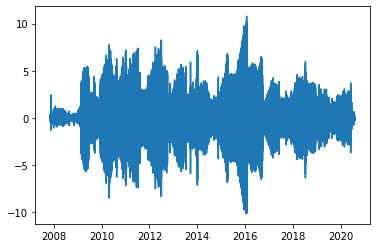

In [8]:
plt.plot(df_test.iloc[1100:].Val.diff())

In [9]:
x = df_test.loc[(df_test.Val > 0) & (df_test.Val < 12),:].Val
x = x.iloc[1100:]
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape(-1,168)

In [10]:
leak_dict = {
    dt.date(2019,8, 1):['Fáfnisnes 24','Meðal'],
    dt.date(2019,6, 4):['Bauganes 3','Lítill'],
    dt.date(2016,7,14):['Bauganes 19','Lítill'],              
    dt.date(2011,2,28):['Skildinganes 4','Meðal'],
    dt.date(2013,8,24):['Skildinganes 19','Meðal'],
    dt.date(2014,1,30):['Skildinganes 33','Meðal'],
}
leak_dict_2 = {
    # More leaks
    dt.date(2010,7,1): ['',''],
    dt.date(2010,6,7): ['',''],
    dt.date(2019,7,1): ['',''],
    dt.date(2010,5,27):['',''],
    dt.date(2017,10,6):['',''],
    dt.date(2007,6,11):['',''],
    dt.date(2011,2,24):['',''],
    dt.date(2013,6,24):['',''],
    dt.date(2014,1,17):[],
    dt.date(2020,1,21):[],
    dt.date(2020,1,21):[],
#     dt.date(2014,,17):[]
}

leak_dict = {}
leak_dict_2 = {}
# # # bakkarnir

# leak_dict = {dt.date(2019, 2, 18):[],
#           dt.date(2018, 5, 14):[],
#           dt.date(2017, 3, 28):[],
#           dt.date(2011, 7, 4):[],
#           dt.date(2017, 6, 6):[],
#           dt.date(2020, 1, 31):[],
#           dt.date(2012, 8, 20):[],
#           dt.date(2019, 9, 30):[],
#           dt.date(2010, 5, 7):[],
#           dt.date(2020, 4, 7):[],
#           dt.date(2019, 8, 12):[],
#           dt.date(2010, 5, 31):[],
#           dt.date(2018, 6, 25):[],
#           dt.date(2018, 4, 24):[]}

# # Höfði 

# leak_dict = {dt.date(2019, 2, 18):[],
#              dt.date(2018, 5, 14):[],
#              dt.date(2017, 3, 28):[],
#              dt.date(2011, 7, 4):[],
#              dt.date(2017, 6, 6):[],
#              dt.date(2020, 1, 31):[],
#              dt.date(2012, 8, 20):[],
#              dt.date(2019, 9, 30):[],
#              dt.date(2010, 5, 7):[],
#              dt.date(2020, 4, 7):[],
#              dt.date(2019, 8, 12):[],
#              dt.date(2010, 5, 31):[],
#              dt.date(2018, 6, 25):[],
#              dt.date(2018, 4, 24):[]}

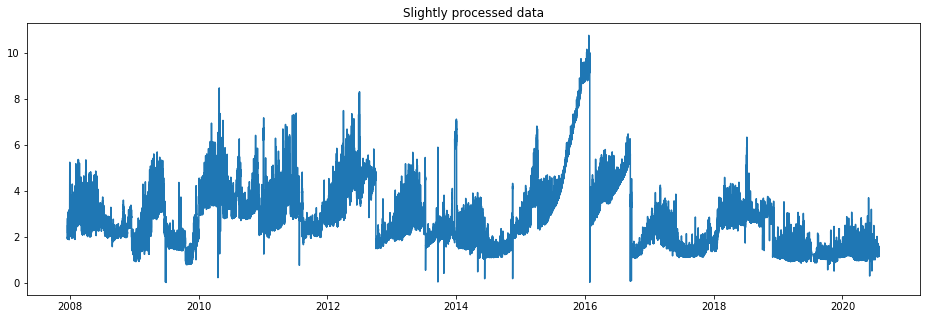

In [11]:
plt.figure(figsize=(16,5))
plt.plot(x)
plt.vlines(list(leak_dict.keys()),0,10,color='red')
plt.vlines(list(leak_dict_2.keys()),0,10,color='green')
plt.title('Slightly processed data')
plt.show()

In [12]:
# for key in leak_dict.keys():
#     subset = df_test.loc[key-dt.timedelta(weeks=4):key+dt.timedelta(weeks=4)]
#     plt.plot(subset.Val)
#     plt.vlines(key,0,10)
#     plt.show()

In [13]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


@ignore_warnings(category=ConvergenceWarning)
def NMF_with_flat_factor(X,n_components,max_iter=10000,tol = 1e-10,alpha = 0):
    n,p = X.shape    
    flat_profile = np.ones((1,p))/(p**(1/2))
    nmf = NMF(n_components=n_components,init='custom',max_iter = 1,tol=1e-10,alpha=alpha)
    
    H_init = np.abs(np.random.normal(0,1,(n_components,p)))
    H_init[0] = np.ones(p)/(p**(1/2))
    W_init = np.abs(np.random.normal(0,1,(n, n_components)))
    
    W = nmf.fit_transform(X,H=H_init,W=W_init)
    H = nmf.components_
    for i in range(max_iter-1):
        W = nmf.fit_transform(X,H=H,W=W)
        H = nmf.components_
        H[0] = flat_profile
    
    return nmf

C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
any(np.isinf(X).ravel())

False

In [15]:
# rank = 3
# nmf = NMF_with_flat_factor(X.reshape(-1,168),rank)

In [16]:
x_smooth = x - x.rolling(168,min_periods=0).min()

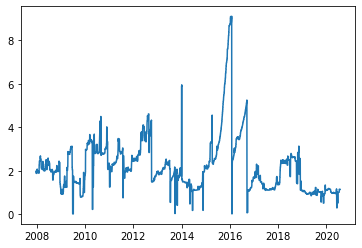

In [17]:
plt.plot(x.rolling(168,min_periods=0).min())

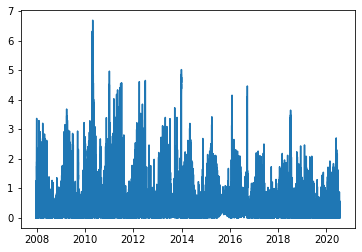

In [18]:
plt.plot(x_smooth)

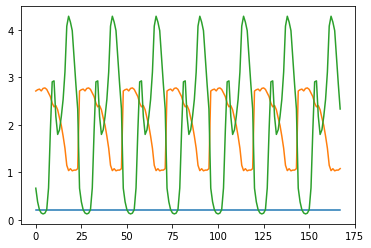

In [19]:
rank = 3
nmf = NMF_with_flat_factor(x_smooth.values.reshape(-1,24)[:400*7],rank,max_iter = 1000,alpha=10)
nmf.components_ = np.repeat(nmf.components_.T,7).reshape(-1,7).T.reshape(-1,3).T
plt.plot(nmf.components_.T)

# Split the abundance estimate and reconstruct & compare with single overall estimate from abundances

In [20]:
# estimated_abundances = nmf.transform(X.reshape(-1,168))
# isolated_abundances = np.zeros([rank] + list(estimated_abundances.shape))
# for i in range(rank):
#     isolated_abundances[i,:,i] = estimated_abundances[:,i]
    
# split_predictictions = np.array([nmf.inverse_transform(x).ravel() for x in isolated_abundances])
# df_split_predictions = pd.DataFrame(original_predictictions.T,index=x.index)

# df_single_nmf_prediction = pd.DataFrame(nmf.inverse_transform(nmf.transform(X.reshape(-1,168))).ravel(),index=x.index)

In [21]:
from scipy.optimize import nnls
def predict_one_week(b,y):
    # Solve the problem of xb = y
    
    x = nnls(b,y,)
    return x[0]

In [22]:
def get_strides_and_shift(array,window = 168):   
    n = array.shape[0] - window + 1
    arr_strided = np.lib.stride_tricks.as_strided(array, shape=[n, window], strides=2*array.strides)
    shifts = np.arange(0,len(arr_strided))%168
    return arr_strided,shifts

In [23]:
print('creating shifted pattern dictionary...')
x_flat = X.ravel()
profile_shift_dict = {i:np.roll(nmf.components_.T,-i,axis=0) for i in range(168)}
X_strided,shifts = get_strides_and_shift(x_flat)

print('Reconstructing/predicting usage composition for every hour...')
pred_stack = np.array([predict_one_week(profile_shift_dict[shifts[i]],X_strided[i]) for i in range(len(X_strided))])


creating shifted pattern dictionary...
Reconstructing/predicting usage composition for every hour...


In [24]:
print('Creating reconstructed usage from predictions...')
predictions = np.zeros((len(pred_stack),168))
separate_predictions = np.zeros((rank,len(pred_stack),168))

for i,abundance_estimates in enumerate(pred_stack):
#     print(profile_shift_dict[i%168].shape)
    predictions[i] = abundance_estimates.reshape(1,-1)@profile_shift_dict[i%168].T
    for p,(abundance,pattern) in enumerate(zip(abundance_estimates,profile_shift_dict[i%168].T)):
        separate_predictions[p,i] = abundance*pattern

Creating reconstructed usage from predictions...


In [25]:
print('Creating per-hour usage composition prediction...')
predictions_fixed = np.zeros((len(x_flat),168))
seperate_predictions_fixed = np.zeros((rank,len(x_flat),168))
for i in range(168):
    start = i
    end = np.min([-167+i,-1])
#     print(start,end)
    if i == 167:
        predictions_fixed[start:,i] = predictions[:,i]
        for s in range(len(separate_predictions)):
            seperate_predictions_fixed[s,start:,i] = separate_predictions[s,:,i]
    else:
        for s in range(len(separate_predictions)):
            seperate_predictions_fixed[s,start:end,i] = separate_predictions[s,:,i]
        predictions_fixed[start:end,i] = predictions[:,i]
        
predictions_fixed[predictions_fixed == 0] = None
prediction_final = np.nanmean(predictions_fixed,axis=1)

separate_predictions_final = np.zeros([len(separate_predictions),len(prediction_final)])
for s in range(len(separate_predictions)):
    seperate_predictions_fixed[seperate_predictions_fixed == 0] = None
    separate_predictions_final[s] = np.nanmean(seperate_predictions_fixed[s],axis=1)

Creating per-hour usage composition prediction...


<ipython-input-25-8d88975f2f6d>:23: RuntimeWarning: Mean of empty slice
  separate_predictions_final[s] = np.nanmean(seperate_predictions_fixed[s],axis=1)


In [26]:
df_final_predictions = pd.DataFrame(separate_predictions_final.T,index=x.index)

In [27]:
df_final_predictions = df_final_predictions.fillna(method='ffill').dropna()

In [28]:
pd.DataFrame([df_final_predictions.loc[:,1:].sum(axis=1),
              df_final_predictions.loc[:,0],
              x],index=['estimated normal','estimated leakage','measured flow']).T.corr()

,estimated normal,estimated leakage,measured flow
estimated normal,1.000000,-0.173259,0.261387
estimated leakage,-0.173259,1.000000,0.877487
measured flow,0.261387,0.877487,1.000000


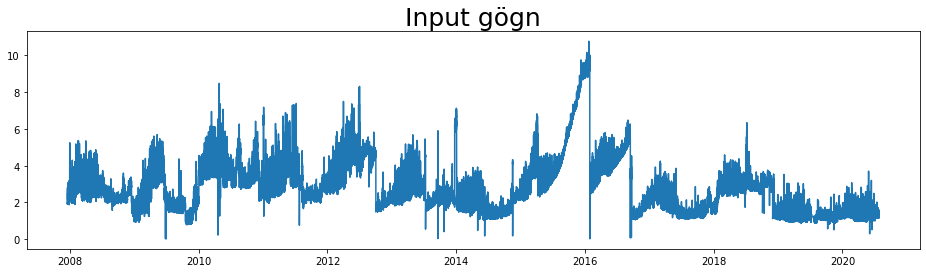

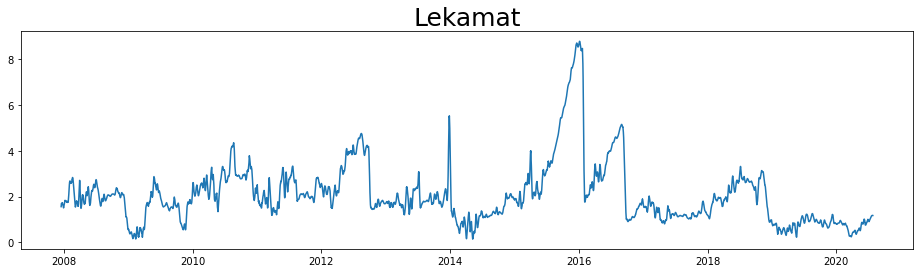

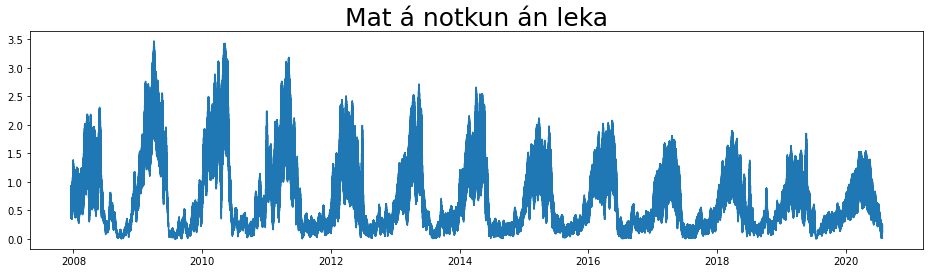

In [55]:
plt.figure(figsize=(16,4))
plt.title('Input gögn',fontsize=25)
plt.plot(x)
plt.vlines(list(leak_dict.keys()),0,10,linestyle='--',color='red')
plt.vlines(list(leak_dict_2.keys()),0,10,linestyle='--',color='green')
plt.show()
############
plt.figure(figsize=(16,4))
plt.plot(df_final_predictions.loc[:,0])
plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
plt.vlines(list(leak_dict_2.keys()),0,5,linestyle='--',color='green')
# plt.title('Lekamat með breyttum NMF mynstrum\nog þekktar lekaviðgerðir',fontsize=25)
plt.title('Lekamat',fontsize=25)
plt.show()
#############
plt.figure(figsize=(16,4))
plt.plot(df_final_predictions.loc[:,1:].sum(axis=1))
plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
plt.vlines(list(leak_dict_2.keys()),0,5,linestyle='--',color='green')
plt.title('Mat á notkun án leka',fontsize=25)
plt.show()
##############
# plt.figure(figsize=(16,5))
# plt.plot(x-df_final_predictions.loc[:,0],alpha=0.5)
# plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
# plt.vlines(list(leak_dict_2.keys()),0,5,linestyle='--',color='green')
# plt.title('Raun-notkun mínus lekamat (mat á notkun án leka + residuals)',fontsize=25)
# plt.show()

# plt.figure(figsize=(16,5))
# plt.plot(x-df_final_predictions.sum(axis=1),alpha=0.5)
# plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
# plt.vlines(list(leak_dict_2.keys()),0,5,linestyle='--',color='green')
# plt.title('Residuals',fontsize=25)
# plt.show()

In [30]:
from scipy.ndimage import gaussian_filter

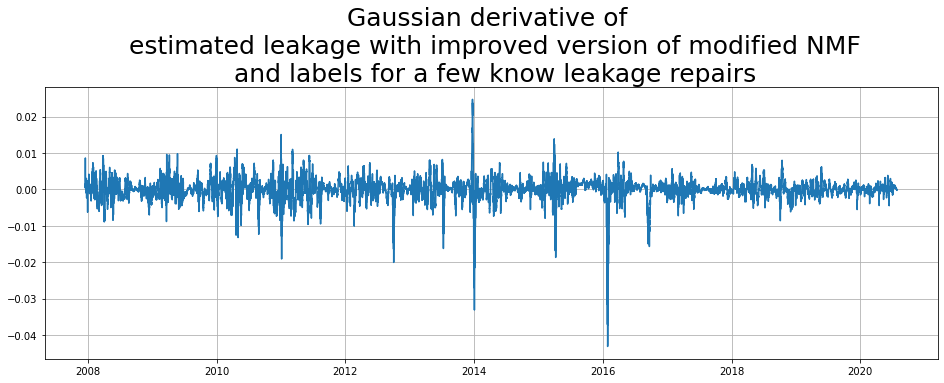

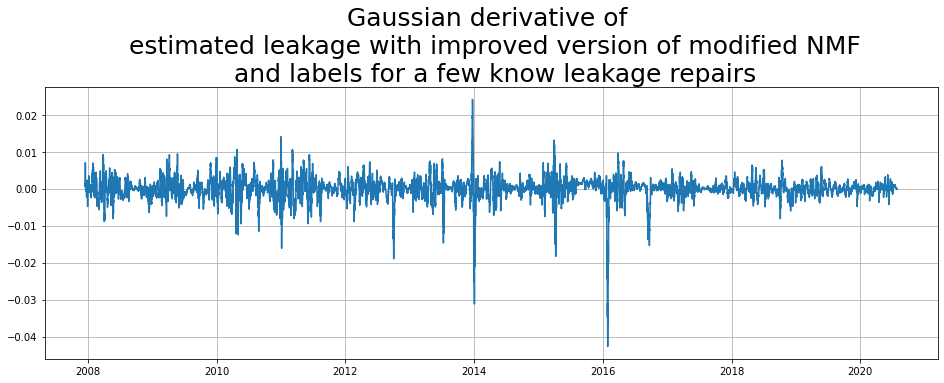

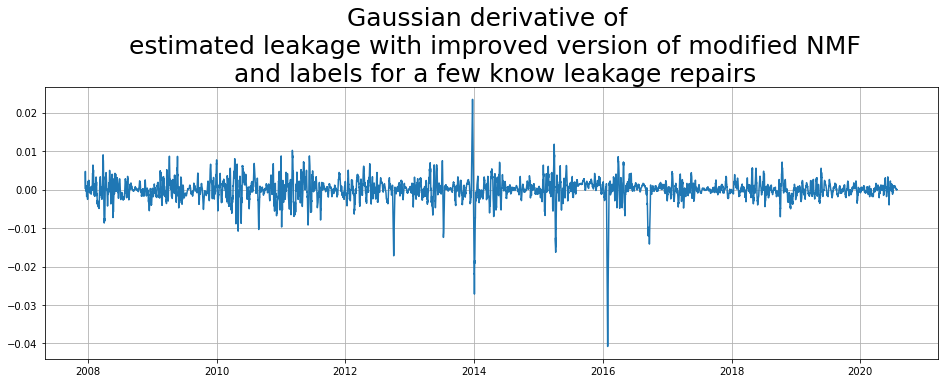

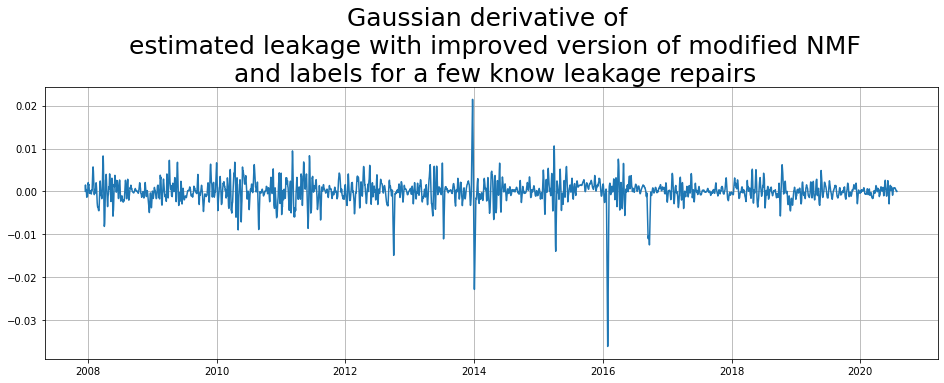

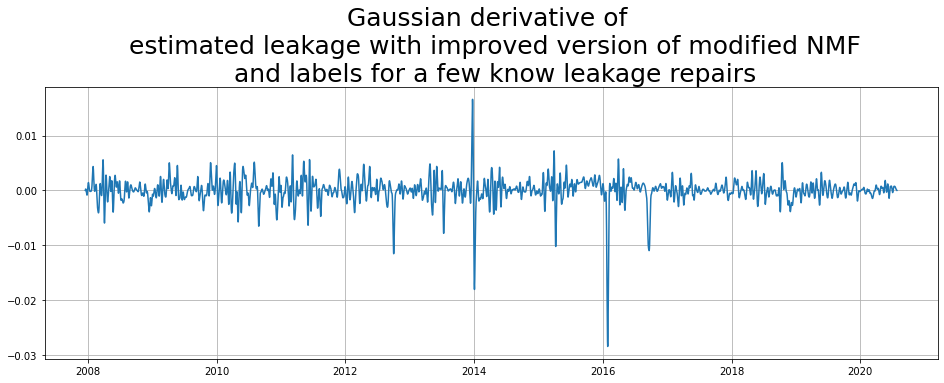

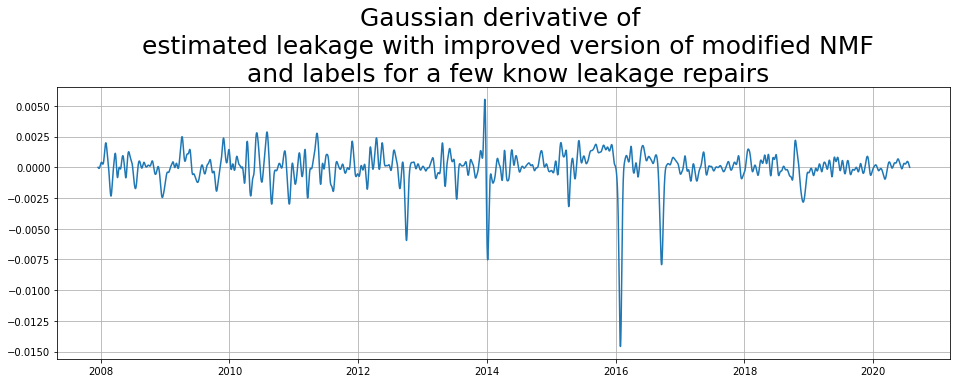

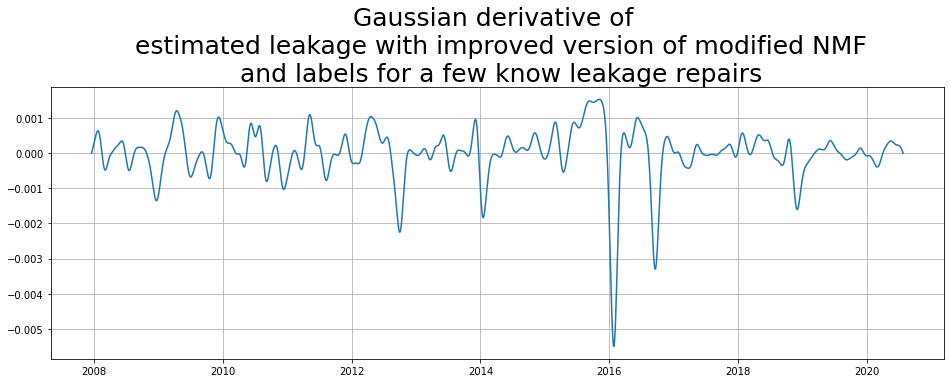

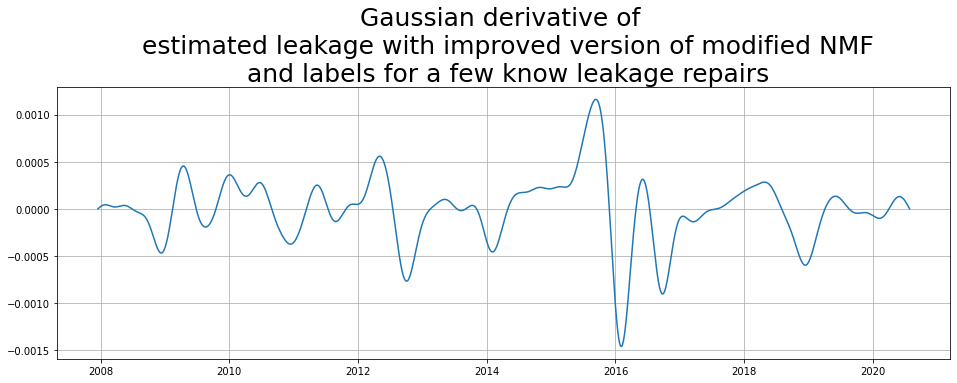

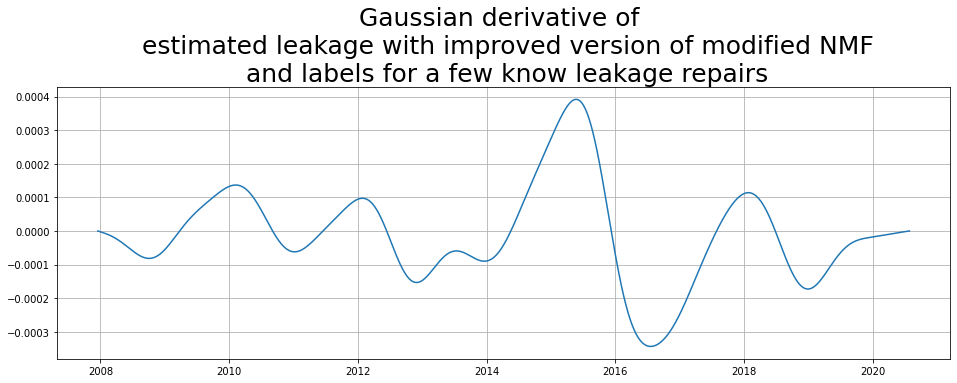

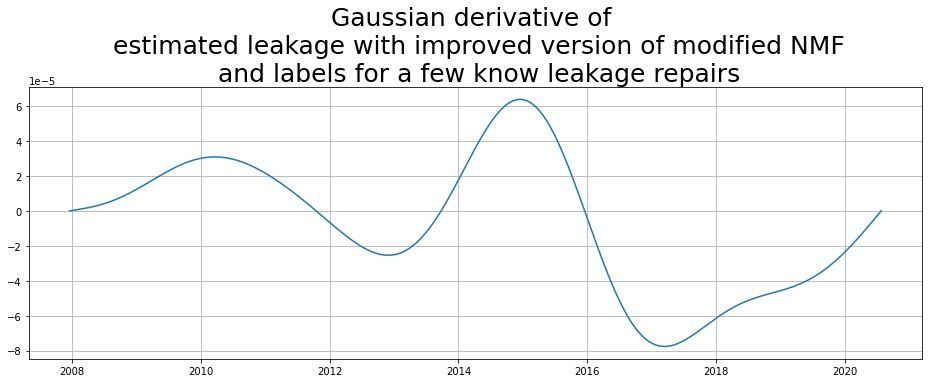

In [31]:
for sigma in np.logspace(0,4,10):
    df_2nd_gaussian = pd.DataFrame(gaussian_filter(df_final_predictions.loc[:,0],sigma=sigma,order=1,),index=df_final_predictions.index)

    plt.figure(figsize=(16,5))
    plt.plot(df_2nd_gaussian.loc[:,0])
    plt.vlines(list(leak_dict.keys()),min(df_2nd_gaussian.loc[:,0]),max(df_2nd_gaussian.loc[:,0]),linestyle='--',color='red')
    plt.vlines(list(leak_dict_2.keys()),min(df_2nd_gaussian.loc[:,0]),max(df_2nd_gaussian.loc[:,0]),linestyle='--',color='green')
    plt.title('Gaussian derivative of \n estimated leakage with improved version of modified NMF\n and labels for a few know leakage repairs',fontsize=25)
    plt.grid()
    plt.show()

<AxesSubplot:>

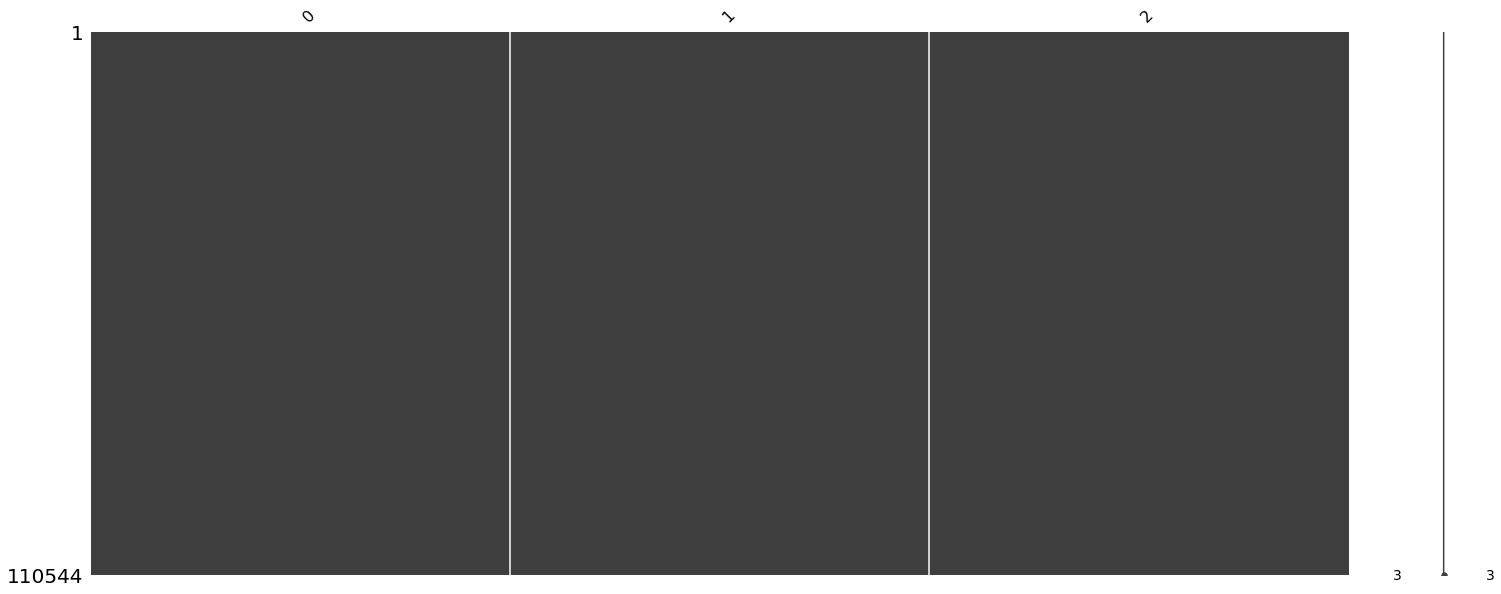

In [32]:
from missingno import matrix
matrix(df_final_predictions)

In [33]:
df_final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110544 entries, 2007-12-17 00:00:00 to 2020-07-26 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       110544 non-null  float64
 1   1       110544 non-null  float64
 2   2       110544 non-null  float64
dtypes: float64(3)
memory usage: 8.4 MB


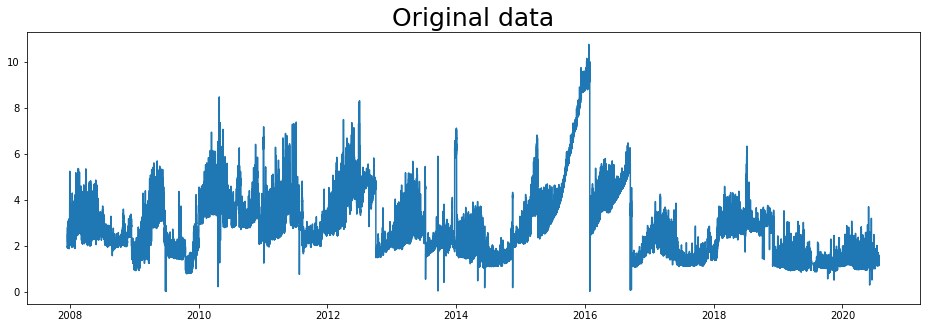

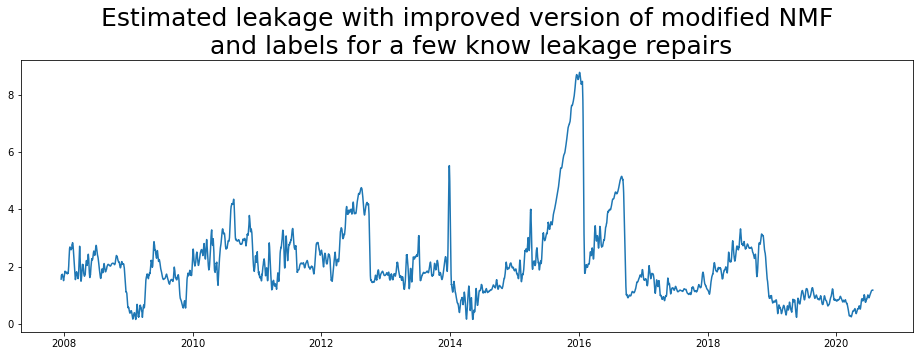

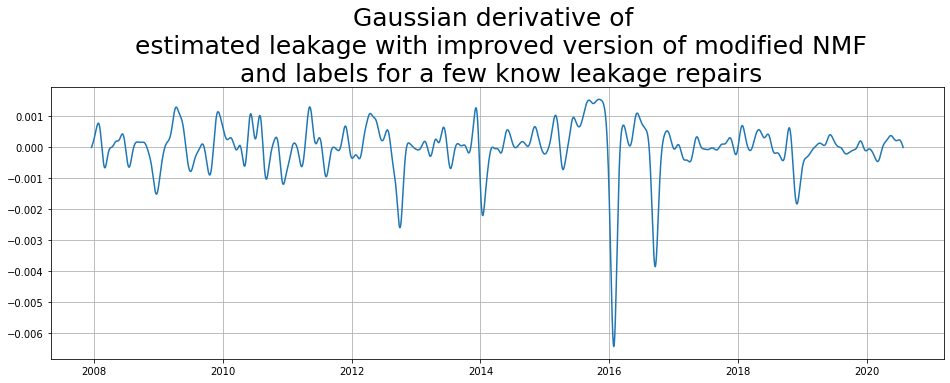

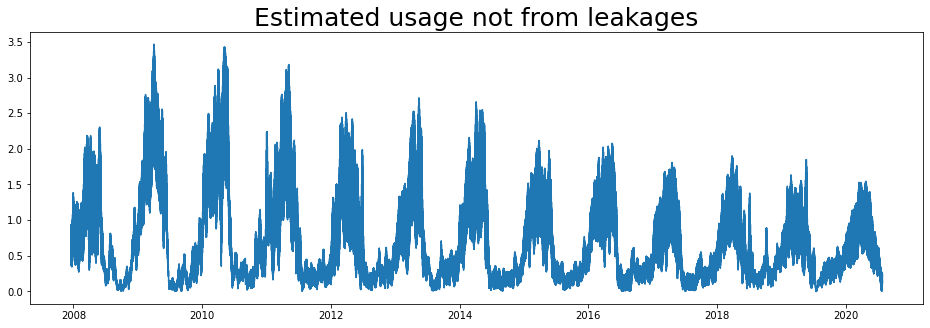

In [34]:
plt.figure(figsize=(16,5))
plt.title('Original data',fontsize=25)
plt.plot(x)
# plt.vlines(list(leak_dict.keys()),0,10,linestyle='--',color='red')
plt.show()

############
plt.figure(figsize=(16,5))
plt.plot(df_final_predictions.loc[:,0])
plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
plt.title('Estimated leakage with improved version of modified NMF\n and labels for a few know leakage repairs',fontsize=25)
plt.show()

#############
df_2nd_gaussian = pd.DataFrame(gaussian_filter(df_final_predictions.fillna(method='ffill').loc[:,0],400,order=1),index=x.index)

plt.figure(figsize=(16,5))
plt.plot(df_2nd_gaussian.loc[:,0])
plt.vlines(list(leak_dict.keys()),min(df_2nd_gaussian.loc[:,0]),max(df_2nd_gaussian.loc[:,0]),linestyle='--',color='red')
plt.title('Gaussian derivative of \n estimated leakage with improved version of modified NMF\n and labels for a few know leakage repairs',fontsize=25)
plt.grid()
plt.show()

#############
plt.figure(figsize=(16,5))
plt.plot(df_final_predictions.loc[:,[1,2]].sum(axis=1))
plt.vlines(list(leak_dict.keys()),0,5,linestyle='--',color='red')
plt.title('Estimated usage not from leakages',fontsize=25)
plt.show()

# Mean square errors

In [35]:
components = nmf.components_
df_raw_NMF = pd.DataFrame(nmf.inverse_transform(nmf.transform(X.reshape(-1,168),)).ravel(),index=x.index)
df_lsq_NMF = pd.DataFrame(np.array([predict_one_week(components.T,tmp_week)[[0]]*components[0] for tmp_week in X.reshape(-1,168)]).ravel(),index=x.index)
df_imp_NMF = df_final_predictions.copy()


C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


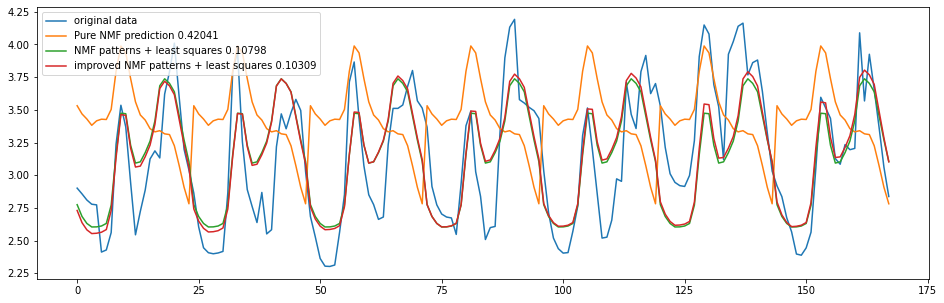

In [36]:
# Original
single_week = X.reshape(-1,168)[20:21]

# NMF preidction
reconstruct = nmf.inverse_transform(nmf.transform(single_week,)).T
reconstruct = (nmf.transform(single_week,)@nmf.components_)[0]

# NMF components + least squares
components = nmf.components_
abundances = predict_one_week(components.T,single_week.ravel())
reconstructed_least_squares = abundances@components

# Improved NMF + least squares
improved_prediction = df_final_predictions.iloc[20*168:21*168].sum(axis=1).values

#### MSE
MSE_func = (lambda x:np.power(x,2).mean())

NMF_MSE = MSE_func(single_week - reconstruct)
NMF_LST_MSE = MSE_func(single_week - reconstructed_least_squares)
NMF_LST_MSE_Improved = MSE_func(single_week - improved_prediction)


### PLOT
plt.figure(figsize=(16,5))
plt.plot(single_week.T)
plt.plot(reconstruct)
plt.plot(reconstructed_least_squares.T)
plt.plot(improved_prediction.T)
plt.plot()

## 

plt.legend([f'original data',
            f'Pure NMF prediction {np.round(NMF_MSE,5)}',
            f'NMF patterns + least squares {np.round(NMF_LST_MSE,5)}',
            f'improved NMF patterns + least squares {np.round(NMF_LST_MSE_Improved,5)}'])
plt.show()

In [37]:
for key in leak_dict.keys():
    plt.figure(figsize=(16,5))
    start,end = key-dt.timedelta(weeks=2),key+dt.timedelta(weeks=2)
    ###
#     subset = df_single_nmf_prediction.loc[start:end]
#     plt.plot(subset.sum(axis=1))
    
#     subset = df_final_predictions.loc[start:end]
#     plt.plot(subset.sum(axis=1))
    
    subset = x.loc[start:end]
    plt.plot(subset)
    plt.legend(['original estimate','improved estimate','real data'])
    
    ### Estimate
    ### Real data
#     subset = df_test.loc[start:end]
#     plt.plot(subset.Val)
    ###
    
    plt.vlines(key,0,2)
    plt.show()

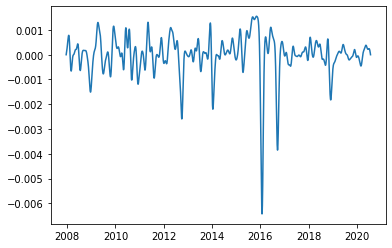

In [38]:
plt.plot(df_2nd_gaussian)

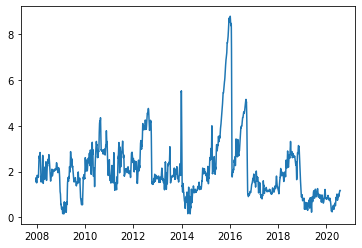

In [39]:
plt.plot(df_final_predictions[0])

# Examples of local increases due to leaks and due to other causes

In [40]:
# Find good sigma for the size of increase we're interested in


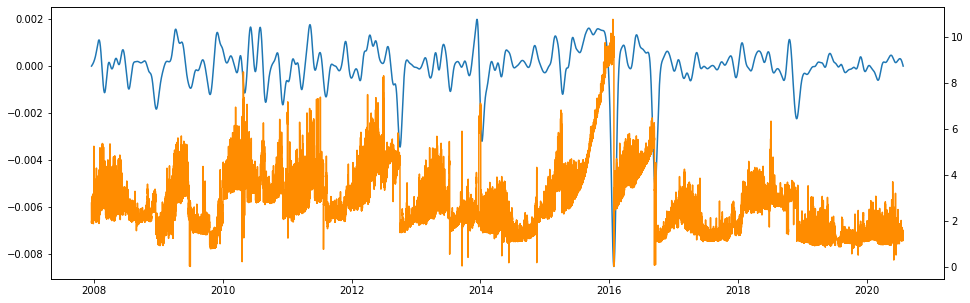

In [41]:
sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(df_final_predictions.fillna(method='ffill').loc[:,0],sigma,order=1),index=x.index)

plt.figure(figsize=(16,5))
plt.plot(df_2nd_gaussian.loc[:,0])
plt.gca().twinx().plot(x,color='darkorange')


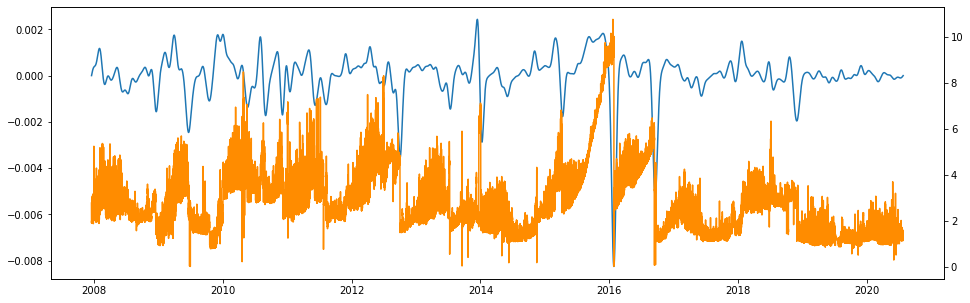

In [42]:
sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(x.fillna(method='ffill'),sigma,order=1),index=x.index)

plt.figure(figsize=(16,5))
plt.plot(df_2nd_gaussian.loc[:,0])
plt.gca().twinx().plot(x,color='darkorange')


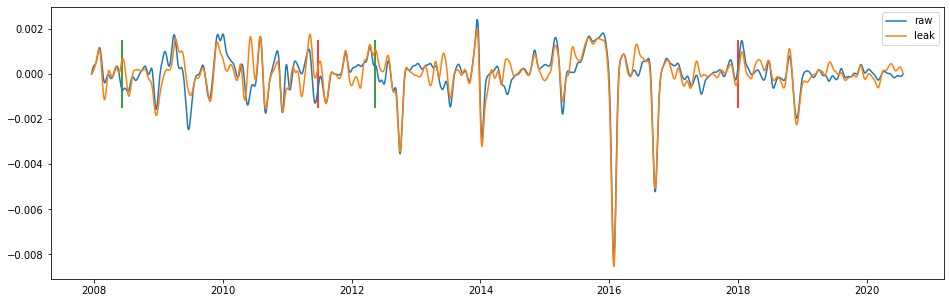

In [43]:
sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(x.fillna(method='ffill'),sigma,order=1),index=x.index)

plt.figure(figsize=(16,5))
plt.plot(df_2nd_gaussian.loc[:,0])

sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(df_final_predictions.fillna(method='ffill').loc[:,0],sigma,order=1),index=x.index)

plt.plot(df_2nd_gaussian.loc[:,0])
plt.legend(['raw','leak'],loc='upper right')


date_of_interest_1 = dt.date(2008,6,5)
date_of_interest_2 = dt.date(2012,5,10)
dates_of_interest_ok = [date_of_interest_1,date_of_interest_2]
date_of_interest_3 = dt.date(2011,6,25)
date_of_interest_4 = dt.date(2018,1,1)
dates_of_interest_bad = [date_of_interest_3,date_of_interest_4]
plt.vlines(dates_of_interest_ok,-1.5e-3,1.5e-3,color='green')
plt.vlines(dates_of_interest_bad,-1.5e-3,1.5e-3,color='red')

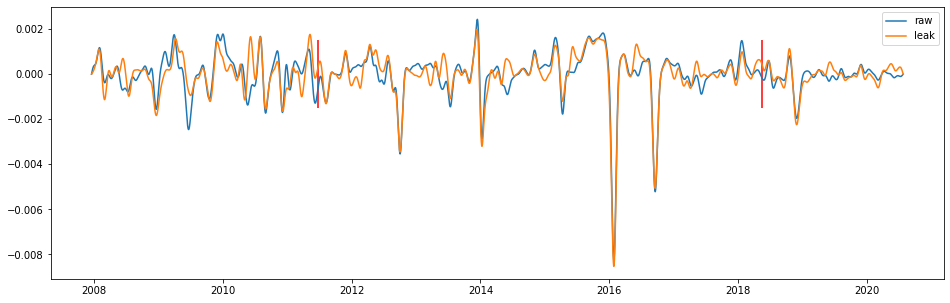

In [44]:
sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(x.fillna(method='ffill'),sigma,order=1),index=x.index)

plt.figure(figsize=(16,5))
plt.plot(df_2nd_gaussian.loc[:,0])

sigma = 300
df_2nd_gaussian = pd.DataFrame(gaussian_filter(df_final_predictions.fillna(method='ffill').loc[:,0],sigma,order=1),index=x.index)

plt.plot(df_2nd_gaussian.loc[:,0])
plt.legend(['raw','leak'],loc='upper right')


date_of_interest_1 = dt.date(2008,6,5)
date_of_interest_2 = dt.date(2012,5,10)
dates_of_interest_ok = [date_of_interest_1,date_of_interest_2]

date_of_interest_3 = dt.date(2011,6,25)
date_of_interest_4 = dt.date(2018,5,16)
dates_of_interest_bad = [date_of_interest_3,date_of_interest_4]

# plt.vlines(dates_of_interest_ok,-1.5e-3,1.5e-3,color='green')
plt.vlines(dates_of_interest_bad,-1.5e-3,1.5e-3,color='red')

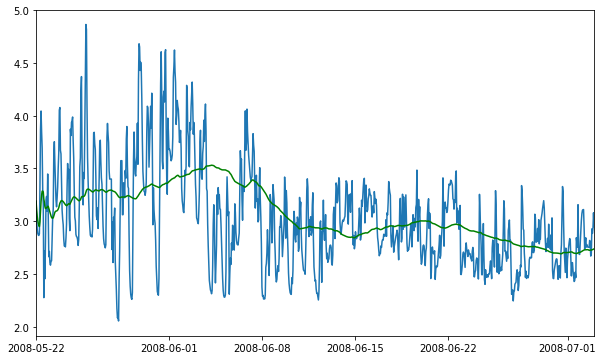

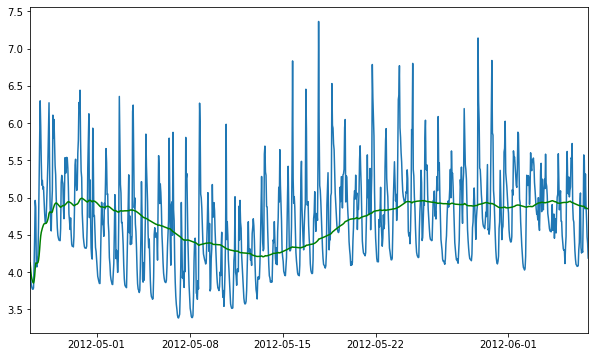

In [45]:
for doi in dates_of_interest_ok:
    plt.figure(figsize=(10,6))
    start,end = doi-dt.timedelta(weeks=2),doi+dt.timedelta(weeks=4)
    ###
#     subset = df_single_nmf_prediction.loc[start:end]
#     plt.plot(subset.sum(axis=1))
    
#     subset = df_final_predictions.loc[start:end]
#     plt.plot(subset.sum(axis=1))
    
    subset = x.loc[start:end]
    plt.plot(subset.index,subset)
    plt.plot(subset.rolling(168,min_periods=0).mean(),c='green')
    
    ### Estimate
    ### Real data
#     subset = df_test.loc[start:end]
#     plt.plot(subset.Val)
    ###
    
    plt.xlim(start,end)
#     plt.vlines(doi,min(subset),max(subset))
    plt.show()
    

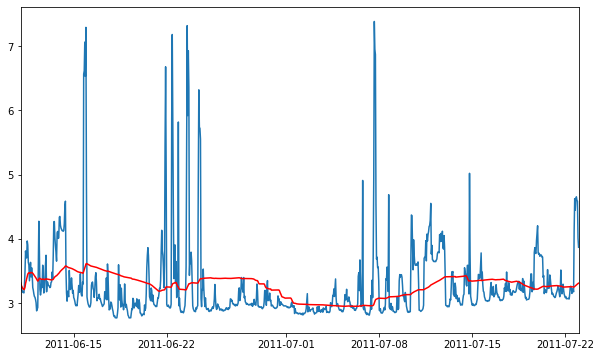

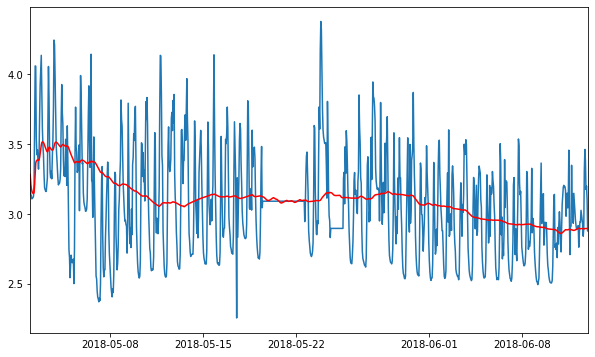

In [46]:
for doi in dates_of_interest_bad:
    plt.figure(figsize=(10,6))
    start,end = doi-dt.timedelta(weeks=2.1),doi+dt.timedelta(weeks=4)
    
    subset = x.loc[start:end]
    plt.plot(subset.index,subset)
    plt.plot(subset.rolling(168,min_periods=0).mean(),c='red')
    
    plt.xlim(start,end)
#     plt.vlines(doi,min(subset),max(subset))
    plt.show()
    
    
    

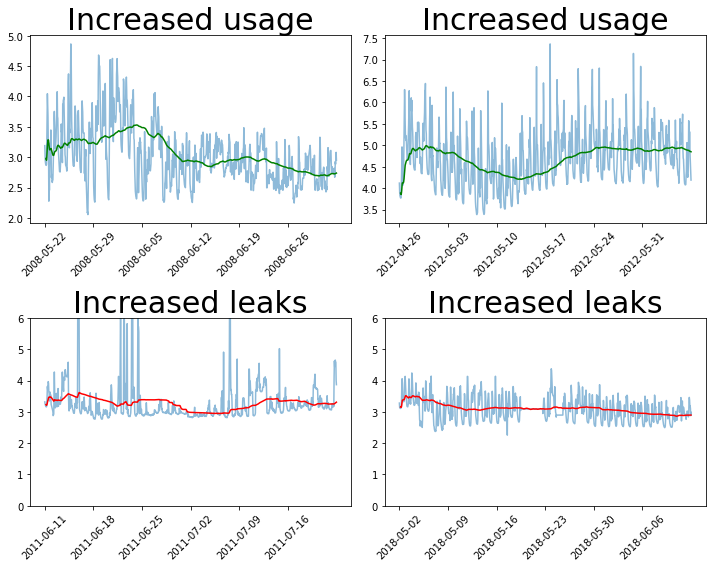

In [47]:
f,ax = plt.subplots(2,2,figsize=(10,8),sharex=False)


for date,upper in zip(dates_of_interest_ok,ax[0]):
    start,end = date-dt.timedelta(weeks=2.1),date+dt.timedelta(weeks=4)
    subset = x.loc[start:end]
    upper.plot(subset.index,subset,alpha=0.5)
    upper.plot(subset.rolling(168,min_periods=5).mean(),c='green')
    
    upper.set_xticks(np.arange(start,end,dt.timedelta(weeks=1)))
    upper.xaxis.set_tick_params(rotation=45)
    
    upper.set_title('Increased usage',fontsize=30)
    
for date,lower in zip(dates_of_interest_bad,ax[1]):
    
    start,end = date-dt.timedelta(weeks=2.1),date+dt.timedelta(weeks=4)
    subset = x.loc[start:end]
    lower.plot(subset.index,subset,alpha=0.5)
    lower.plot(subset.rolling(168,min_periods=5).mean(),c='red')

    lower.set_xticks(np.arange(start,end,dt.timedelta(weeks=1)))
    lower.xaxis.set_tick_params(rotation=45)
    lower.set_ylim(0,6)
    lower.set_title('Increased leaks',fontsize=30)
    
plt.tight_layout()

# Residual analysis

In [48]:
residuals = x-df_final_predictions.sum(axis=1)

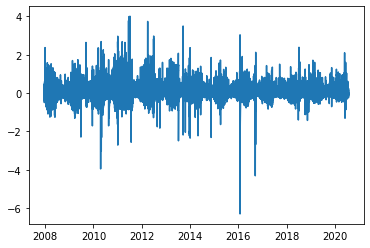

In [49]:
plt.plot(residuals)

In [50]:
R = pd.DataFrame(residuals.values.reshape(-1,24*7))

### Autocorelation in specific week-hours indicates an evolving pattern

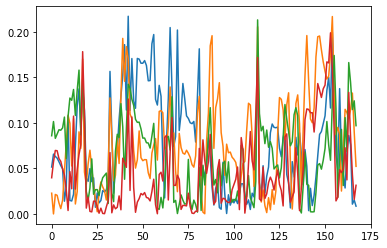

In [51]:
# 1-autocorr

for j in range(1,5):
    AR_1 =[R.loc[:,i].autocorr(j) for i in R.columns]
    plt.plot(np.abs(AR_1))
#     plt.vlines(np.arange(0,169,24),-0.1,0.25,color='red',linestyle='--')

#     plt.show()
#     plt.hist(AR_1)
#     plt.show()

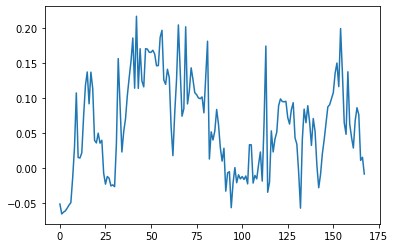

In [52]:
AR_1 =[R.loc[:,i].autocorr(1) for i in R.columns]
plt.plot(AR_1)

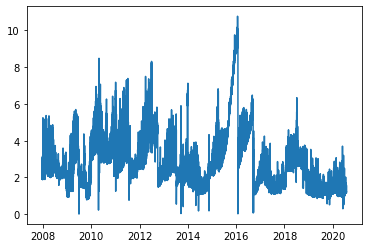

In [53]:
plt.plot(x)

In [54]:
R.rolling(52,min_periods=52).apply(auto_corr).abs().sum(axis=1).plot()

NameError: name 'auto_corr' is not defined

In [ ]:
Rolling_redisual_autocorrelation_df = pd.DataFrame([R.loc[:,i].rolling(100,min_periods=10).apply(auto_corr).abs() for i in range(168)])
Rolling_redisual_autocorrelation_df = Rolling_redisual_autocorrelation_df.T

In [ ]:
Rolling_redisual_autocorrelation_df.abs().sum(axis=1).plot()

In [ ]:
# R.loc[:,0].rolling(10).apply(lambda x: print(x[1:].values,x[:-1]))#np.corrcoef(x[1:],x[:-1]))
auto_corr = lambda x: np.corrcoef(x[1:],x[:-1])[0,1]

# for i in range(10):


plt.plot()


# plt.plot(R.loc[:,1].rolling(100,min_periods=10).apply(auto_corr))

In [ ]:
AR_1 =[R.loc[:,i].autocorr(1) for i in R.columns]
plt.plot(AR_1)

In [ ]:
plt.plot(c)

In [ ]:
from matplotlib import gridspec
from matplotlib.lines import Line2D



def area_plot_predictions(week = 20,ax=plt):
    start = week*168
    end = (week+1)*168 + 1
    
    true_data = x.iloc[start:end]
    reco_data = df_final_predictions.iloc[start:end]
    
    min_val = np.min(true_data)
    max_val = np.max(true_data)
    
    true_data.index = np.arange(0,169)
    reco_data.index = np.arange(0,169)

    combined = reco_data.sum(axis=1)
    ax.stackplot(reco_data.index,reco_data.T,alpha=0.5)

    ax.plot(combined,c='red',linestyle='--')
    ax.plot(true_data,c='black')

    ax.legend(['Summa mynstra','Raunmælingar','Lekamat','Mynstur A','Mynstur B'],loc='upper right')
    ax.set_title('Sundurliðuð notkun',fontsize=20)
    ax.set_xlabel('Klukkustundir',fontsize=15)
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=15)
    
    ax.vlines(np.arange(0,169,24),0,max_val,color='grey',linestyle='--')

def area_plot_predictions_patterns(week = 20,ax=plt):
    pass
    
def weekplot(week = 20):
    fig = plt.figure(figsize=(16, 9)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1]) 
    ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2])]
    
    min_val = np.min(X[week])
    max_val = np.max(X[week])
    
    ax[0].plot(X[week].ravel()[:24*5],color='blue')
    ax[0].plot(np.arange(24*5,24*7),X[week].ravel()[24*5:],color='red')
    ax[0].vlines(np.arange(0,169,24),min_val,max_val,color='grey',linestyle='--')
    ax[0].set_title('Flæðimælingar frá einni viku',fontsize=20)
    ax[0].set_xlabel('Klukkustundir',fontsize=15)
    ax[0].set_ylabel('Meðal flæði [l/s]',fontsize=15)

    ax[1].plot(X[week].reshape(7,24).T[:,:5],color='blue')
    ax[1].plot(X[week].reshape(7,24).T[:,5:],color='red' )
    ax[1].set_title('Flæðimælingar frá einni viku',fontsize=20)
    ax[1].set_xlabel('Klukkustundir',fontsize=15)
    ax[1].set_ylabel('Meðal flæði [l/s]',fontsize=15)


    # Legend
    legend_elements = [Line2D([0], [0], color='b', label='Vinnuvika'),
                       Line2D([0], [0], color='r', label='Helgi')]

    ax[0].legend(handles=legend_elements,loc='lower right')
    ax[1].legend(handles=legend_elements,loc='lower right')

    area_plot_predictions(week,ax=ax[2])
    
    plt.tight_layout()
    

In [ ]:
for i in range(20):
    weekplot(100+4*i)
    plt.show()